In [1]:
import pandas as pd
import string
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
products = pd.read_csv('amazon_baby.csv')

In [3]:
def remove_punctuation(text):
    return re.sub(r'[^\w\s]','',text) 

In [4]:
products['review'] = products.review.fillna('')

In [5]:
products['review_clean'] = products.review.apply(lambda x: remove_punctuation(x))

In [6]:
products = products[products['rating'] != 3]

In [7]:
products['sentiment'] = products['rating'].apply(lambda rating : +1 if rating > 3 else -1)

In [8]:
train_idx = pd.read_json('module-9-assignment-train-idx.json')
test_idx = pd.read_json('module-9-assignment-test-idx.json')

In [9]:
train_data = products.iloc[train_idx[0]]
test_data = products.iloc[test_idx[0]]

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
     # Use this token pattern to keep single-letter words
# First, learn vocabulary from the training data and assign columns to words
# Then convert the training data into a sparse matrix
train_matrix = vectorizer.fit_transform(train_data['review_clean'])
# Second, convert the test data into a sparse matrix, using the same word-column mapping
test_matrix = vectorizer.transform(test_data['review_clean'])

In [11]:
model = LogisticRegression()
model.fit(train_matrix,train_data['sentiment'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=test_data['sentiment'].to_numpy(), y_pred=model.predict(test_matrix))
print ("Test Accuracy: %s" % accuracy)

Test Accuracy: 0.9323254139668826


In [13]:
baseline = len(test_data[test_data['sentiment'] == 1])/len(test_data)
print ("Baseline accuracy (majority class classifier): %s" % baseline)

Baseline accuracy (majority class classifier): 0.8427825773938085


In [14]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_true=test_data['sentiment'].to_numpy(),
                        y_pred=model.predict(test_matrix),
                        labels=model.classes_)    # use the same order of class as the LR model.
print (' target_label | predicted_label | count ')
print ('--------------+-----------------+-------')
# Print out the confusion matrix.
# NOTE: Your tool may arrange entries in a different order. Consult appropriate manuals.
for i, target_label in enumerate(model.classes_):
    for j, predicted_label in enumerate(model.classes_):
        print ('{0:^13} | {1:^15} | {2:5d}'.format(target_label, predicted_label, cmat[i,j]))

 target_label | predicted_label | count 
--------------+-----------------+-------
     -1       |       -1        |  3788
     -1       |        1        |  1453
      1       |       -1        |   803
      1       |        1        | 27292


In [15]:
1453 * 100 + 803

146103

In [16]:
from sklearn.metrics import precision_score
precision = precision_score(y_true=test_data['sentiment'], 
                            y_pred=model.predict(test_matrix))
print( "Precision on test data: %s" % precision)

Precision on test data: 0.9494520786223691


In [17]:
1453 / (1453+27292)

0.050547921377630894

In [18]:
from sklearn.metrics import recall_score
recall = recall_score(y_true=test_data['sentiment'],
                      y_pred=model.predict(test_matrix))
print ("Recall on test data: %s" % recall)

Recall on test data: 0.9714184018508631


In [19]:
27292 / (3788 + 1453 + 803 + 27292)

0.8186945044396449

In [20]:
def apply_threshold(probabilities, threshold):
    func = lambda x: 1 if x > threshold else -1
    func = np.vectorize(func)  
    return func(probabilities)

In [21]:
probabilities = model.predict_proba(test_matrix)[:,1]

In [22]:
apply_threshold(probabilities, 0.5)

array([1, 1, 1, ..., 1, 1, 1])

In [23]:
threshold_values = np.linspace(0.5, 0.99, num=100)
print (threshold_values)

[0.5        0.50494949 0.50989899 0.51484848 0.51979798 0.52474747
 0.52969697 0.53464646 0.53959596 0.54454545 0.54949495 0.55444444
 0.55939394 0.56434343 0.56929293 0.57424242 0.57919192 0.58414141
 0.58909091 0.5940404  0.5989899  0.60393939 0.60888889 0.61383838
 0.61878788 0.62373737 0.62868687 0.63363636 0.63858586 0.64353535
 0.64848485 0.65343434 0.65838384 0.66333333 0.66828283 0.67323232
 0.67818182 0.68313131 0.68808081 0.6930303  0.6979798  0.70292929
 0.70787879 0.71282828 0.71777778 0.72272727 0.72767677 0.73262626
 0.73757576 0.74252525 0.74747475 0.75242424 0.75737374 0.76232323
 0.76727273 0.77222222 0.77717172 0.78212121 0.78707071 0.7920202
 0.7969697  0.80191919 0.80686869 0.81181818 0.81676768 0.82171717
 0.82666667 0.83161616 0.83656566 0.84151515 0.84646465 0.85141414
 0.85636364 0.86131313 0.86626263 0.87121212 0.87616162 0.88111111
 0.88606061 0.8910101  0.8959596  0.90090909 0.90585859 0.91080808
 0.91575758 0.92070707 0.92565657 0.93060606 0.93555556 0.94050

In [24]:
recall_all = []
precision_all = []
probabilities = model.predict_proba(test_matrix)[:,1]
for thresh in threshold_values:
    prob = apply_threshold(probabilities, thresh)
    recall = recall_score(y_true=test_data['sentiment'],y_pred=prob)
    precision = precision_score(y_true=test_data['sentiment'],y_pred=prob)
    precision_all.append(precision)
    recall_all.append(recall)
print(precision_all)

[0.9494520786223691, 0.9500853390922707, 0.9504933235714534, 0.9508476941324217, 0.9512620884683867, 0.9517385986370784, 0.9520528782262013, 0.9523409615788369, 0.952856292248958, 0.9531737408432932, 0.9534883720930233, 0.9537349059253019, 0.9540569020021075, 0.9545087010019335, 0.9547581354441512, 0.955065675951685, 0.9554490342591287, 0.9557625145518044, 0.9562453649751033, 0.9564940802261884, 0.9569725062807403, 0.9572237960339943, 0.9576081948038139, 0.9579343122650209, 0.9581603321622485, 0.9585168347776672, 0.9590015289976176, 0.9594546490103945, 0.9597719579547479, 0.960402397260274, 0.9607198971575489, 0.9612195296304239, 0.9617036506800286, 0.9619518486672399, 0.962450238496575, 0.9629150960330282, 0.9630268405734612, 0.9635454152871743, 0.9640386278466417, 0.9643668626248783, 0.9646493825377338, 0.964926236621348, 0.9651752099623516, 0.965463506559397, 0.9656773819026195, 0.9660308810172571, 0.9663174741743052, 0.9667783768031473, 0.9672053405318645, 0.9677289671807616, 0.968

In [25]:
def plot_pr_curve(precision, recall, title):
    plt.rcParams['figure.figsize'] = 7, 5
    plt.locator_params(axis = 'x', nbins = 5)
    plt.plot(precision, recall, 'b-', linewidth=4.0, color = '#B0017F')
    plt.title(title)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.rcParams.update({'font.size': 16})

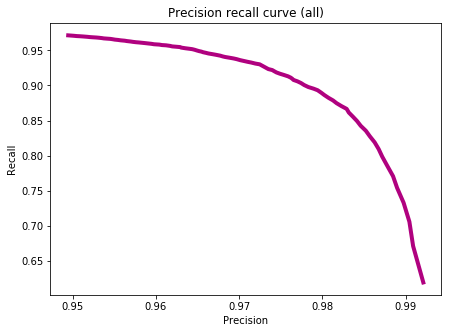

In [26]:
plot_pr_curve(precision_all, recall_all, 'Precision recall curve (all)')

In [27]:
threshold_values[np.array(precision_all)>=0.965].min()

0.7078787878787879

In [28]:
threshold = 0.98
predictions = apply_threshold(probabilities, threshold)
confusion_matrix = confusion_matrix(test_data['sentiment'], predictions)


array([[ 5050,   191],
       [ 8247, 19848]], dtype=int64)

In [29]:
tn, fp, fn, tp = confusion_matrix.ravel()

In [62]:
fn

8247

In [53]:
test_data['name'] = test_data.name.fillna('')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
baby_reviews = test_data[test_data['name'].apply(lambda x: 'baby' in x.lower())]

In [55]:
baby_reviews

,name,review,rating,review_clean,sentiment
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4,This has been an easy way for my nanny to reco...,1
10,"Baby Tracker&reg; - Daily Childcare Journal, S...",I love this journal and our nanny uses it ever...,4,I love this journal and our nanny uses it ever...,1
56,Baby's First Year Undated Wall Calendar with S...,I searched high and low for a first year calen...,5,I searched high and low for a first year calen...,1
59,Our Baby Girl Memory Book,Absolutely love it and all of the Scripture in...,5,Absolutely love it and all of the Scripture in...,1
112,Newborn Baby Tracker&reg; - Round the Clock Ch...,This is the best way to keep track of when you...,5,This is the best way to keep track of when you...,1
...,...,...,...,...,...
183406,My Learning Lovey by Baby Jack. Educational ba...,Amazing products come from Baby Jack Blankets!...,5,Amazing products come from Baby Jack Blankets ...,1
183414,"Samsung Baby Care Washer, Stainless Platinum, ...","My infant goes to a really crappy daycare, and...",1,My infant goes to a really crappy daycare and ...,-1
183459,Sweet CareFor Bamboo Baby Wipes - 80 Wipe Pack...,"Gave these a try and was impressed! Thick, du...",5,Gave these a try and was impressed Thick dura...,1
183465,Swaddle - &quot;Classic&quot; Zen Swaddle - We...,Overall we really like this swaddle; the light...,4,Overall we really like this swaddle the light ...,1


In [56]:
baby_matrix = vectorizer.transform(baby_reviews['review_clean'])
probabilities = model.predict_proba(baby_matrix)[:,1]

In [57]:
threshold_values = np.linspace(0.5, 0.99, num=100)

In [59]:
recall_all_subset = []
precision_all_subset = []
probabilities = model.predict_proba(baby_matrix)[:,1]
for thresh in threshold_values:
    prob = apply_threshold(probabilities, thresh)
    recall_subset = recall_score(y_true=baby_reviews['sentiment'],y_pred=prob)
    precision_subset = precision_score(y_true=baby_reviews['sentiment'],y_pred=prob)
    precision_all_subset.append(precision_subset)
    recall_all_subset.append(recall_subset)

In [60]:
threshold_values[np.array(precision_all_subset)>=0.965].min()

0.7276767676767677

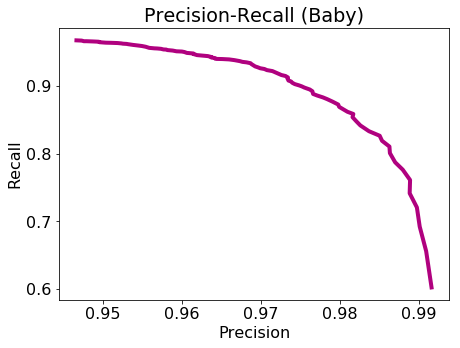

In [61]:
plot_pr_curve(precision_all_subset, recall_all_subset, "Precision-Recall (Baby)")